# Activity 3.3 K Nearest Neighbors 

Objective(s):

This activity aims to perform classification using K Nearest Neighbors

Intended Learning Outcomes (ILOs):
* Build the model using K Nearest Neighbors.
* Evaluate the performance of the model.
* Choose the best k-value.


Resources:
* Jupyter Notebook
* Classified data

Procedure:

Import the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


Load the data. Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv(
    r"C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 312\KNN-SVM-NaiveBayes\Classified Data", index_col=0)


In [3]:
df.head()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1



Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler


In [5]:
scaler = StandardScaler()


In [6]:
scaler.fit(df.drop('TARGET CLASS', axis=1))


StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))


In [8]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


Split the data into a training set and a testing set

In [9]:
from sklearn.model_selection import train_test_split


In [12]:
train_inputs, test_inputs, train_target, test_target = train_test_split(
    df_feat, df['TARGET CLASS'], test_size=0.30)


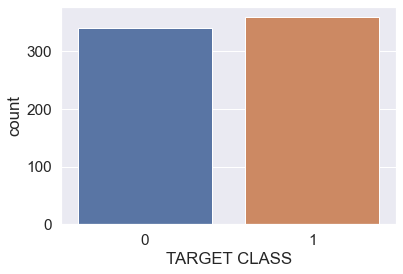

In [38]:
sns.countplot(x=train_target)


    Train target column does not seem to be imbalanced

Buid a model using k=1 

Remember that wwe are building a model to predict whether someone will TARGET CLASS or not. 

In [20]:
from sklearn.neighbors import KNeighborsClassifier


In [21]:
knn = KNeighborsClassifier(n_neighbors=1)


In [23]:
knn.fit(train_inputs, train_target)


KNeighborsClassifier(n_neighbors=1)

In [24]:
pred = knn.predict(test_inputs)


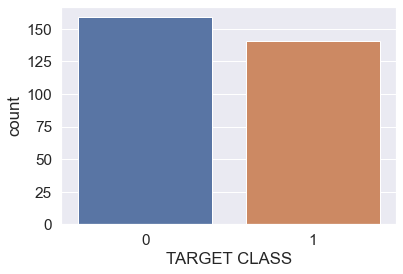

In [37]:
sns.countplot(x=test_target)


    Data doesn't seem to be imbalanced

Evaluate the KNN model.

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [31]:
print(confusion_matrix(test_target, pred, labels=[0, 1]))


[[148  11]
 [ 13 128]]


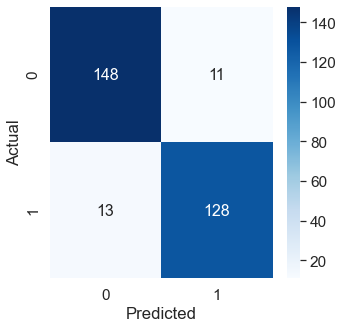

In [27]:
data = confusion_matrix(test_target, pred)
df_cm = pd.DataFrame(data, columns=np.unique(pred),
                     index=np.unique(test_target))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize=(5, 5))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(df_cm, cmap="Blues", fmt='d', annot=True, annot_kws={"size": 16})


In [39]:
print(classification_report(test_target, pred))


              precision    recall  f1-score   support

           0       0.92      0.93      0.93       159
           1       0.92      0.91      0.91       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



Choose a K value. Create a method to pick a good value of K.

In [40]:
error_rate = []


for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_inputs, train_target)
    pred_i = knn.predict(test_inputs)
    error_rate.append(np.mean(pred_i != test_target))


Create a visualization to compare the error rate and k value

Text(0, 0.5, 'Error Rate')

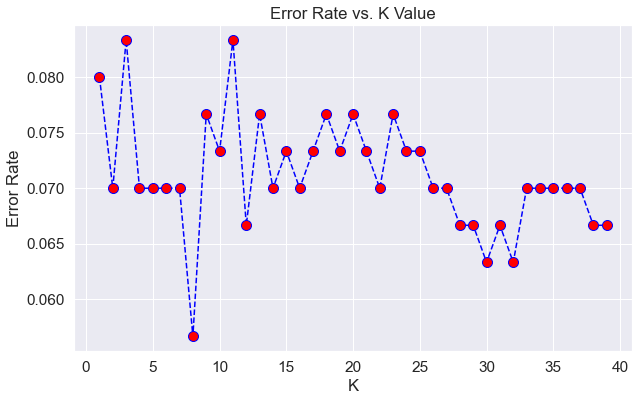

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


Text(0, 0.5, 'Error Rate')

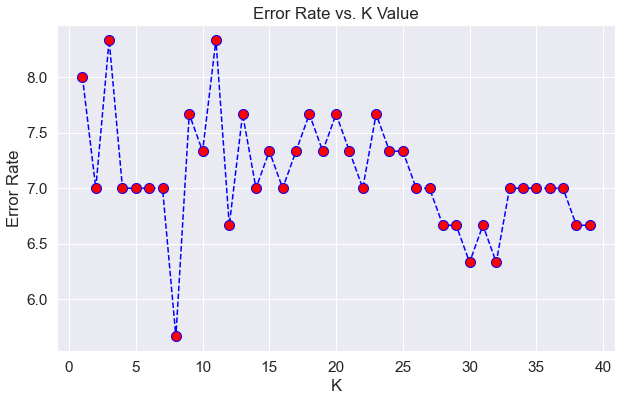

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), (np.array(error_rate)*100).reshape(-1, 1), color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


Interpret the result of the graph

    The least amount of error is when k = 8

Compare the classification report of K=1 and K=23

In [53]:
# K = 1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(train_inputs, train_target)
pred = knn.predict(test_inputs)

print('WITH K=1')
print('\n')
print(confusion_matrix(test_target, pred))
print('\n')
print(classification_report(test_target, pred))


WITH K=1


[[148  11]
 [ 13 128]]


              precision    recall  f1-score   support

           0       0.92      0.93      0.93       159
           1       0.92      0.91      0.91       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [54]:
#K = 23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(train_inputs, train_target)
pred = knn.predict(test_inputs)

print('WITH K=1')
print('\n')
print(confusion_matrix(test_target, pred))
print('\n')
print(classification_report(test_target, pred))


WITH K=1


[[143  16]
 [  7 134]]


              precision    recall  f1-score   support

           0       0.95      0.90      0.93       159
           1       0.89      0.95      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



In [56]:
#K = 23
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(train_inputs, train_target)
pred = knn.predict(test_inputs)

print('WITH K=8')
print('\n')
print(confusion_matrix(test_target, pred))
print('\n')
print(classification_report(test_target, pred))


WITH K=8


[[150   9]
 [  8 133]]


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       159
           1       0.94      0.94      0.94       141

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



    As was indicative of the error rate vs k_value, the best k_value is 8. Between k= 1,23,8 the model with the least amount of error is the one with the k=8. It has the best classfificaton report for precision, recall, and F1 score

Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 

In [58]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn = knn.fit(train_inputs, train_target)


y_pred = knn.predict(test_inputs)

print(accuracy_score(test_target, y_pred))


0.9166666666666666


Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

In [60]:
knn = KNeighborsClassifier(n_neighbors=5, weights="uniform", p=1)

knn = knn.fit(train_inputs, train_target)

y_pred = knn.predict(test_inputs)

print(accuracy_score(test_target, y_pred))


0.92


Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`?

In [61]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k

score_list = list()

for k in range(1, 30):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(train_inputs, train_target)

    y_pred = knn.predict(test_inputs)
    score = accuracy_score(test_target, y_pred)

    score_list.append((k, score))

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])


In [62]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


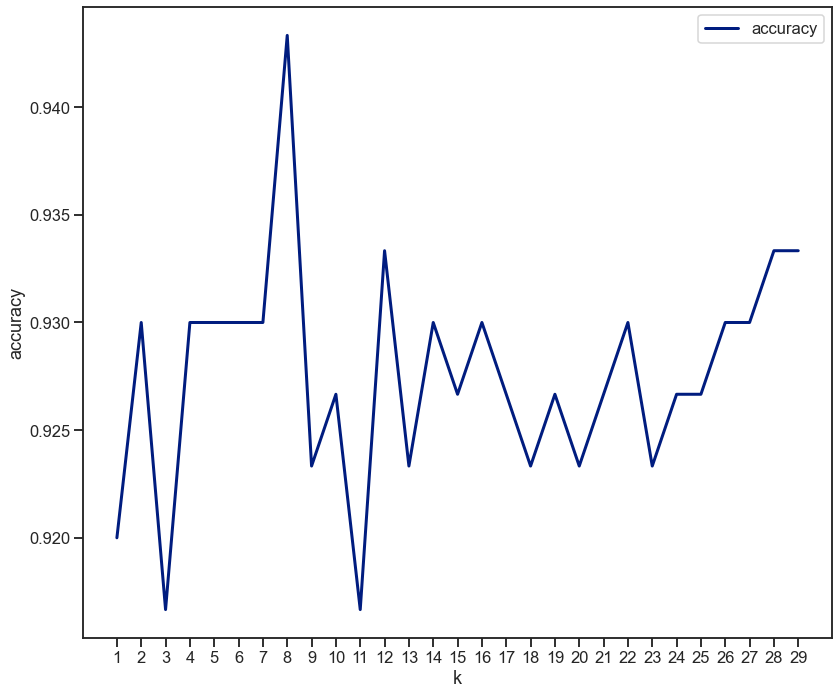

In [83]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot(figsize=(12, 10), linewidth=3,)

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 30))
# plt.figure(figsize = (10,30))
plt.tight_layout()


    Similar to when we graphed error rate vs. k, the best k_value with the highest accuracy is 8.

Supplementary Activities:

Supplementary Activity:
* Choose your own dataset 
* Import the dataset 
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Standardize the variables.
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization 
* Build the model using K Nearest Neighbor. Use k value from 1 to 50. 
* Evaluate the model using classification report, accuracy , confusion matrix and roc_auc_score
* Compare the model using their accuracy report. 
* Create a graph to compare the accuracy based from eah k values.

In [84]:
df = pd.read_csv(
    r"C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 312\KNN-SVM-NaiveBayes\knn.csv", header=None)
df.shape


(699, 11)

In [85]:
# add our columns
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names
df.head()


,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<AxesSubplot:title={'center':'Target Variable Distribution'}>

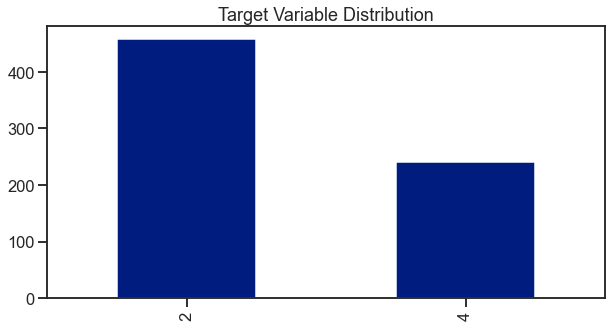

In [87]:
# determine the types of target variables and their distributions/frequency

df.iloc[:, -1].value_counts().plot(kind='bar',
                                   title='Target Variable Distribution', figsize=(10, 5))


In [88]:
df.drop('Id', axis=1, inplace=True)


In [91]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [107]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')


In [110]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [111]:
# check for missing values
df.isnull().sum()


Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

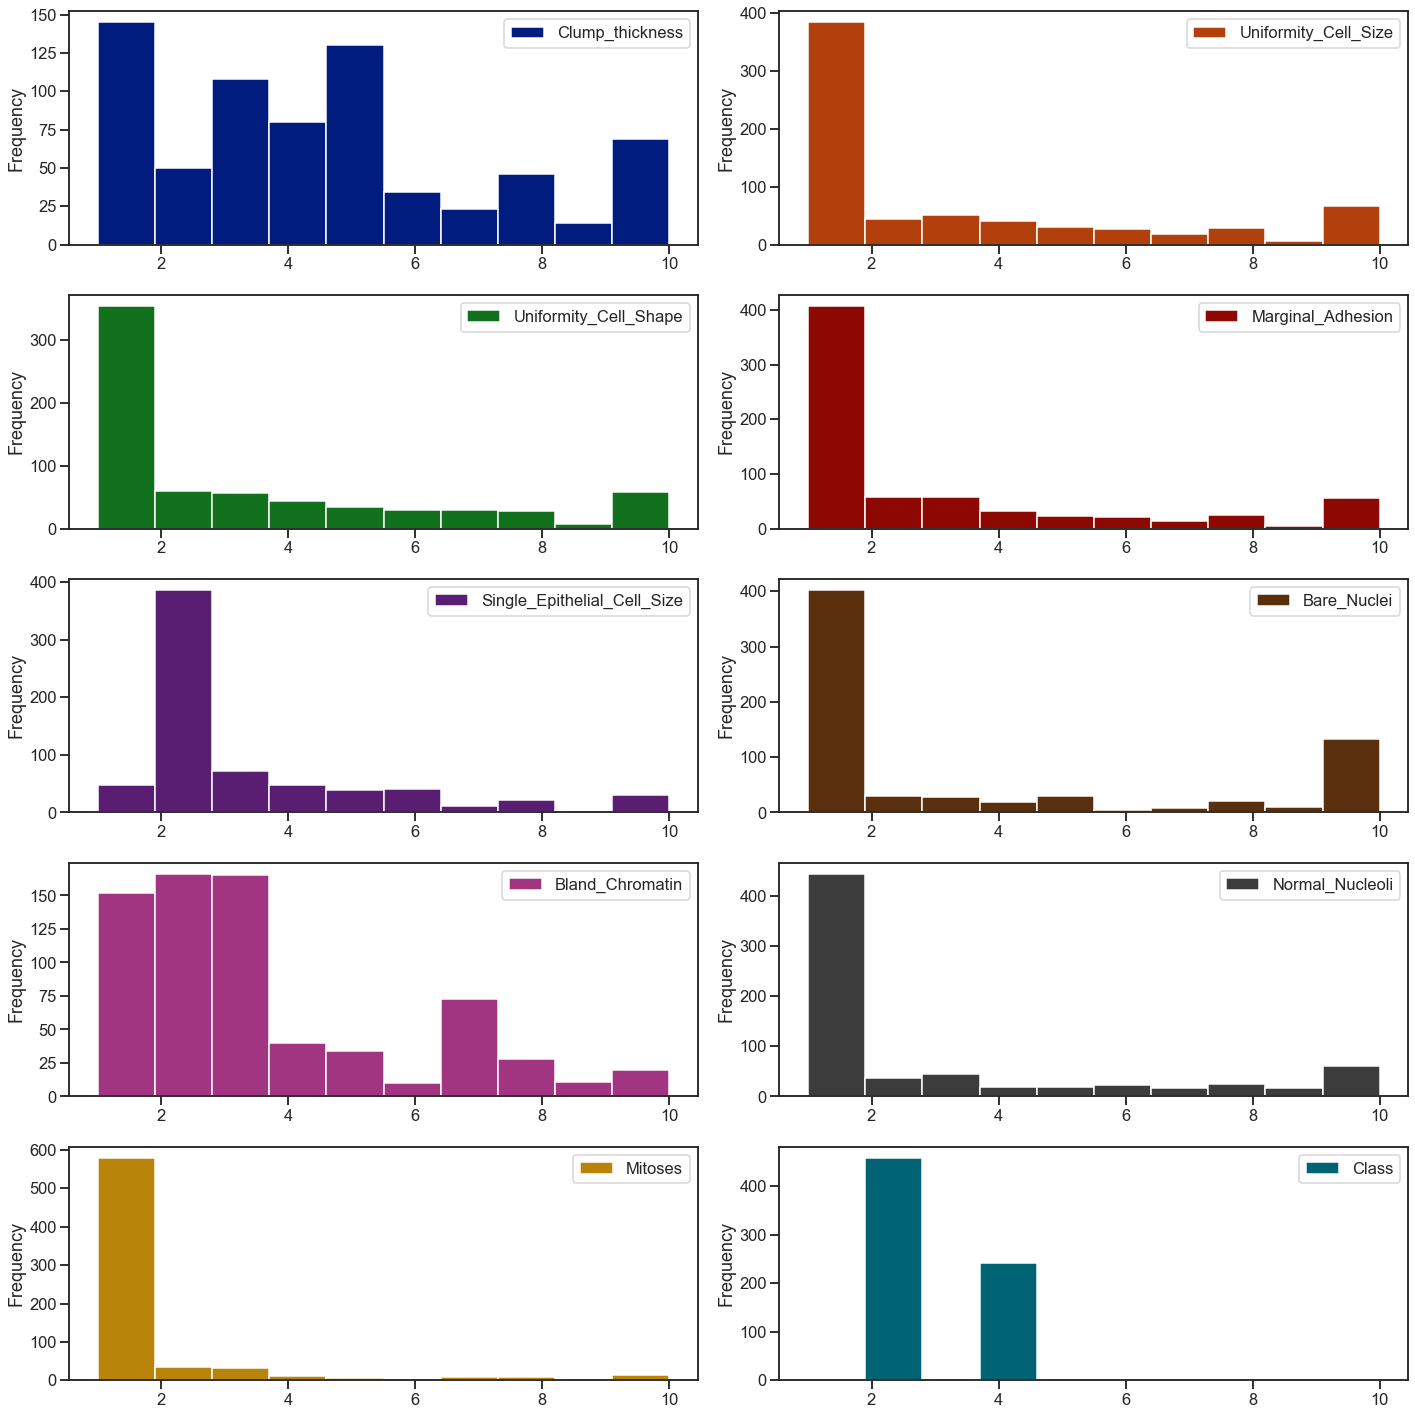

In [112]:
df.plot(kind="hist", bins=10, subplots=True, layout=(
    5, 2), sharex=False, sharey=False, figsize=(20, 20))
plt.tight_layout()
plt.show()


    Feature columns are positively/right skewed.

In [114]:
df.corr().iloc[:, -1].sort_values(ascending=False)


Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

    all of our feature values are positively correlated with class. 

# Splitting the dataset into training, validation, and test sets

In [134]:
X = df.drop('Class', axis=1)
y = df['Class']


In [135]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=101)
train_df, val_df = train_test_split(
    train_val_df, test_size=0.25, random_state=101)


In [136]:
print("shape of train_df is {}".format(train_df.shape))
print("shape of validity_df is {}".format(val_df.shape))
print("shape of test_df is {}".format(test_df.shape))


shape of train_df is (419, 10)
shape of validity_df is (140, 10)
shape of test_df is (140, 10)


In [137]:
train_inputs = train_df.drop('Class', axis=1).copy()
train_target = train_df["Class"].copy()
val_inputs = val_df.drop('Class', axis=1).copy()
val_target = val_df["Class"].copy()
test_inputs = test_df.drop('Class', axis=1).copy()
test_target = test_df["Class"].copy()


## Imputing missing data


In [139]:
# check the columns that have nan values and how many
train_inputs.isnull().sum()


Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    8
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [146]:
# check if data in Bare_Nuclei have outliers. If there are many we can use median instead of mean.
print(val_inputs.Bare_Nuclei.mean(),
      val_inputs.Bare_Nuclei.median())
print(train_inputs.Bare_Nuclei.mean(),
      train_inputs.Bare_Nuclei.median())
print(test_inputs.Bare_Nuclei.mean(),
      test_inputs.Bare_Nuclei.median())


3.3582089552238807 1.0
3.506082725060827 1.0
3.8405797101449277 1.0


    Since the mean and media are different, we can infer that the distribution is skewed. Actually, as we saw earlier all of the data are positvely skewed. I think it is best that we pick the median number to fill out missing valuse for the column `Bare_Nuclei`.

In [148]:
from sklearn.impute import SimpleImputer

# create an imputer object
imputer = SimpleImputer(strategy="median")


In [149]:
# fit the imputer model to fill each column with missing values the mean value for that column
imputer.fit(train_inputs)


SimpleImputer(strategy='median')

In [150]:
# the object imputer now contains an atribute called .statistics_ which contains the mean value for each column. We can access this:
list(imputer.statistics_)


[4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0]

In [151]:
num_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
num_cols


['Clump_thickness',
 'Uniformity_Cell_Size',
 'Uniformity_Cell_Shape',
 'Marginal_Adhesion',
 'Single_Epithelial_Cell_Size',
 'Bare_Nuclei',
 'Bland_Chromatin',
 'Normal_Nucleoli',
 'Mitoses']

In [152]:
# we need to inject these values in the predictor variable for all our datasets.

train_inputs[num_cols] = imputer.fit_transform(train_inputs[num_cols])
val_inputs[num_cols] = imputer.fit_transform(val_inputs[num_cols])
test_inputs[num_cols] = imputer.fit_transform(test_inputs[num_cols])


In [153]:
# check to see if there are any null/na values in our data. test data is used here but all datasets have been checked for missing values and all columns are filled.
test_inputs.isnull().sum()


Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

## Normalizing our Numerical columns


In [132]:
from sklearn.preprocessing import MinMaxScaler

# create an object for MinMaxScaler
scaler = MinMaxScaler()

# scaler.transform({data fram with num cols}) will result in the scaling of the values from (0,1)

train_inputs[num_cols] = scaler.fit_transform(train_inputs[num_cols])
val_inputs[num_cols] = scaler.fit_transform(val_inputs[num_cols])
test_inputs[num_cols] = scaler.fit_transform(test_inputs[num_cols])


In [133]:
# verify that the scaling worked (val_inputs is used to see the max and min but train_inputs and test_inputs both have a max of 1 and min of 0)
val_inputs[num_cols].describe().loc[["min", "max"]]


,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Changin the target values from 2->0 and 4->1
0 : benign cancer<br>
1 : malignant cancer

In [166]:
val_target.replace({2: 0, 4: 1}, inplace=True)


In [169]:
train_target.replace({2: 0, 4: 1}, inplace=True)
test_target.replace({2: 0, 4: 1}, inplace=True)


In [170]:
# all target values have been change, only train is shown here.
train_target.value_counts()


0    274
1    145
Name: Class, dtype: int64

## Training KNN Model
base model

In [171]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_jobs=-1)
knn_model.fit(train_inputs, train_target)


KNeighborsClassifier(n_jobs=-1)

In [172]:
knn_model.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [176]:
val_pred = knn_model.predict(val_inputs)
val_pred = pd.Series(val_pred)
val_pred.value_counts()


0    93
1    47
dtype: int64

## Classification Metrics prior to Hypertuning

In [177]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


In [194]:
def pre_recall_curve(clf, input, target):
    '''
        target: target column
        input: input columns
        clf: classifier

    #? Function Outputs a precision(y-axis) vs recall/senstivity(x-axis) graph. It also shows the F1 score as well as the area under the curve (AUC) score which summarizes the performance of the model.
    #! Currently configure to work for binary target columns/data
    #! Best metric for imbalanced datasets
    #* compare the AUC scores for pre_recall_curve VS. roc_curve and notice if there is difference.
    #* Key feature is that True Negatives (or the class that is the majority) are not taken into consideration. It is only concerned with the prediction of the minority class.
    #* This helps interpret the performance of models with imbalanced datasets because the difference between the two curves is between Precision (TP/(TP+FN)) and 1-Specificity/FPR (1-(TN/(TN+FP)))

        Given: TN = 1310; TP = 90; FP = 116
        FPR/1-Specificity/X-axis/ROC_curve = 0.08 (ideal, should be close to 0)
        Precision/Y-axis/Precision_Recall_curve = 0.43 (not ideal, should be close to 1)

    #! Looking at the ROC curve we might be misled that the score of 0.08 is ideal when in fact this is not ideal at all since the formula to get this utilized the majority class, and therefore a big numerator value. This will cause the evaluator to neglect the TP values and FP values (which we want to increase and decrease, respectively), thus not allowing our model to be modified to better predict the positive class. You will end up with a class that is not good with predicting 1s.
    #! We neglected to evaluate the difference between ROC-curve's sensitivity and pr_recall_curve's recall since they are the same formula and produce the same values. 
    '''
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import f1_score
    from matplotlib import pyplot

    lr_precision, lr_recall, _ = precision_recall_curve(target, clf.predict_proba(
        input)[:, 1], pos_label=target.value_counts().sort_values(ascending=False).index[-1])

    lr_f1, lr_auc = f1_score(target, clf.predict(input), pos_label=target.value_counts(
    ).sort_values(ascending=False).index[-1]), auc(lr_recall, lr_precision)
    # summarize scores
    print('KNN: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    no_skill = len(target[target == target.value_counts().sort_values(
        ascending=False).index[-1]]) / len(target)
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--',
                label='No Skill/baseline: {0:.2f}'.format(no_skill))
    pyplot.plot(lr_recall, lr_precision, marker='.', label='KNN')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    pyplot.plot(1., 1., marker='.')
    pyplot.annotate(xy=[1., 1.], xytext=[0.8, 1.05],
                    text="optimal point (1,1)", size=10)
    # show the plot
    pyplot.tight_layout()
    pyplot.show()


def accuracyscores(clf, prior_inputs, prior_target, new_inputs, new_target):
    print("train model score {}".format(clf.score(prior_inputs, prior_target)))
    print("non-train model score {}".format(clf.score(new_inputs, new_target)))

    y_majority = np.full(new_target.shape[0], new_target.value_counts(
    ).sort_values(ascending=False).index[0])
    y_random = np.random.choice(val_target.value_counts().sort_values(
        ascending=False).index.tolist(), new_target.shape[0])

    print("random model accuracy score {}".format(
        accuracy_score(new_target, y_random)))
    print("majority model accuracy score {}".format(
        accuracy_score(new_target, y_majority)))


def confusionmatrixplot(clf, inputs, target):
    prediction = clf.predict(inputs)

    data = confusion_matrix(target, prediction)
    df_cm = pd.DataFrame(data, columns=np.unique(
        prediction), index=np.unique(target))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize=(5, 5))
    sns.set(font_scale=1.4)  # for label size
    sns.heatmap(df_cm, cmap="Blues", fmt='d',
                annot=True, annot_kws={"size": 16})


def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    try:
        y_score = clf.decision_function(X_test)
        print("Using decision_function method")
    except:
        y_score = clf.predict_proba(X_test)
        print("Using predict_proba method")

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(
        'Receiver operating characteristic for RandomForest_roc_auc_cruve')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (
            roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.tight_layout()
    plt.show()


In [185]:
accuracyscores(knn_model, train_inputs, train_target, val_inputs, val_target)


train model score 0.9737470167064439
non-train model score 0.95
random model accuracy score 0.5071428571428571
majority model accuracy score 0.6714285714285714


    There does not seem to be any case of overfitting since our model was able to generalize on our validation dataset. The scores for the training and validation datasets are high and comparable.

    We can benchmark our model against baseline models wherein the predicted values are either random (y_random) or contains the majority target class (y_majority). Checking their accuracies and comparing our model's own accuracy against these dumb models can give as a pretty good idea whether our model is worthwhile and better. Fortunately, our model outperformed both the dumb models using the accuracy metric.

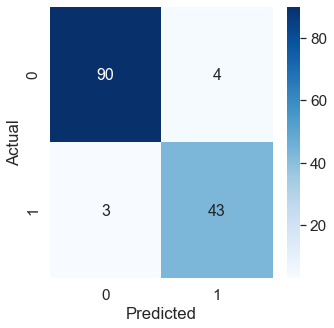

In [188]:
confusionmatrixplot(knn_model, val_inputs, val_target)


    So far our model is looking very promising! There are very few False Negatives and False Positives in our predictions.

In [189]:
print(classification_report(val_target, knn_model.predict(val_inputs)))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96        94
           1       0.91      0.93      0.92        46

    accuracy                           0.95       140
   macro avg       0.94      0.95      0.94       140
weighted avg       0.95      0.95      0.95       140



    The precision and recall scores are higher for class 0, which is expected given that it's class that is twice the amount of class 1. However, the model is doing fairly well for predicting class 1. We can say that in terms of prediction for class 1, our model is correct 91% of the time. However, the the model was only able to predict 93% of all 46 True Positive instances (class 1). 

In [190]:
roc_auc_score(val_target, knn_model.predict_proba(val_inputs)[:, 1])


0.9833487511563368

Using predict_proba method


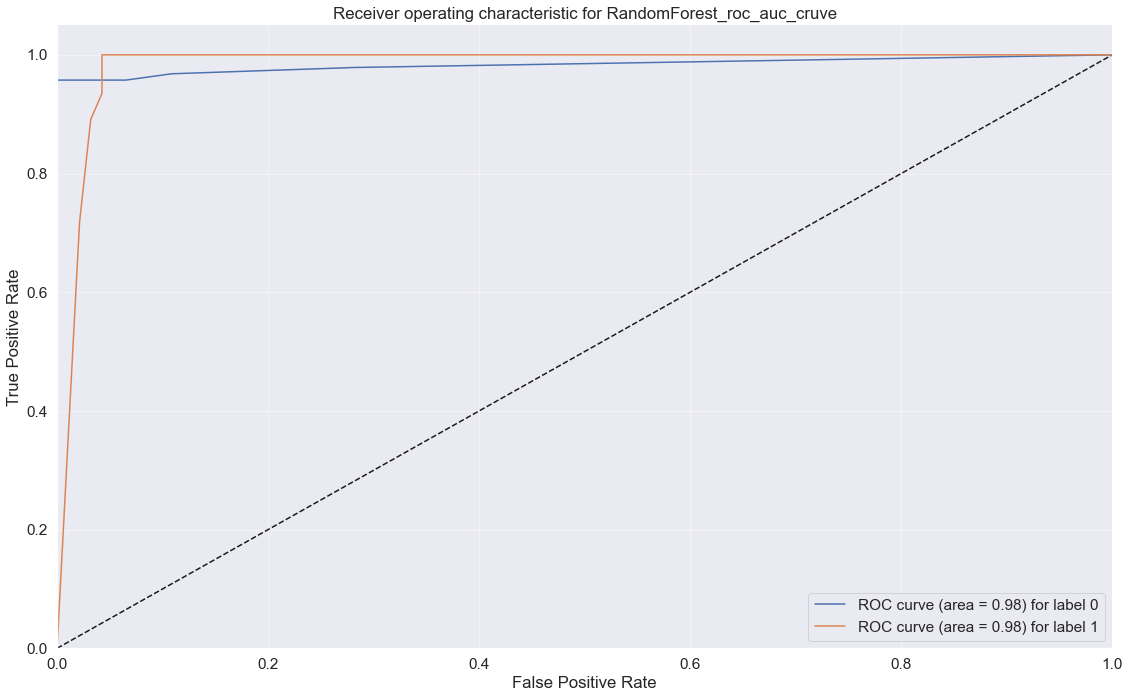

In [191]:
plot_multiclass_roc(knn_model, val_inputs, val_target, 2, figsize=(16, 10))


    ideal is 1.0, since we are at 0.98 for both classes, the model is performing well. Notice that the ROC curve and score for both of the classes are the similar (model isn't better at predicting No vs. Yes) despite having different recall and precision scores. It is worth noting that Recall for class 0 remains high all throughout the different thresholds, whereas, the recall for class 1 steadly drops from 1 to 0 as the line nears the maximum threshold value. I am somewhat suspicious of this graph, but based on our confusion matrix maybe the model is just performming really well. I would say the roc curve and aus score for it is a good indicator of the model's performance since the target values are not too heavily imabalanced.

KNN: f1=0.925 auc=0.960


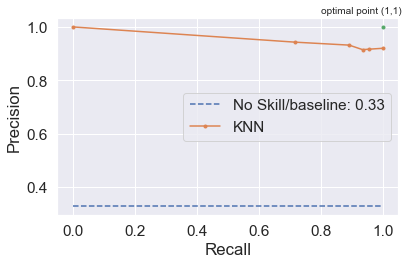

In [195]:
pre_recall_curve(knn_model, val_inputs, val_target)


    Usually, when precision decreases, recall increases... which is certainly the case here. Our F1 score and AUC score are both favorable. The different precision and recall scores are all looking very promising. I'd say this model is very good at predicting class 1. Persoanlly, I would choose a threshold that has greater recall than precision since False Negatives during breast cancer diagnosis is a better news than a False Positive. To reach a high recall score, it seems that we don't need to compromse that much precision, so that is very advantageous.

# Hypertuning base KNN model

In [196]:
knn_random_grid = {
    'leaf_size': [n for n in range(1, 20)],
    'n_neighbors': [n for n in range(1, 51)],
    'p': [1, 2],
    'weights': ['uniform', 'distance']
}


In [197]:
from sklearn.model_selection import GridSearchCV


In [198]:
knn_model_optimized = GridSearchCV(KNeighborsClassifier(
    n_jobs=-1), knn_random_grid, cv=2, verbose=True, n_jobs=-1)


In [199]:
knn_model_optimized.fit(train_inputs, train_target)


Fitting 2 folds for each of 3800 candidates, totalling 7600 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=True)

In [200]:
knn_model_optimized.best_params_


{'leaf_size': 1, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

In [202]:
knn_model_optimized.best_estimator_


KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=3)

In [204]:
knn_model.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

    It seems that there isn't too much of a difference between the parameters of our base and optimized model. leaf_size changed from 30 to 1, n_neighbors changed from 5 to 3.

In [205]:
val_pred_optimized = knn_model_optimized.predict(val_inputs)


## Classification Metrics on Optimized KNN Model

In [206]:
accuracyscores(knn_model_optimized, train_inputs,
               train_target, val_inputs, val_target)


train model score 0.9809069212410502
non-train model score 0.95
random model accuracy score 0.5
majority model accuracy score 0.6714285714285714


In [207]:
accuracyscores(knn_model, train_inputs, train_target, val_inputs, val_target)


train model score 0.9737470167064439
non-train model score 0.95
random model accuracy score 0.4357142857142857
majority model accuracy score 0.6714285714285714


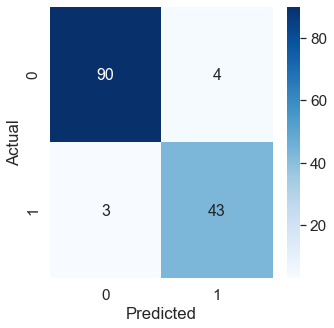

In [209]:
confusionmatrixplot(knn_model, val_inputs, val_target)


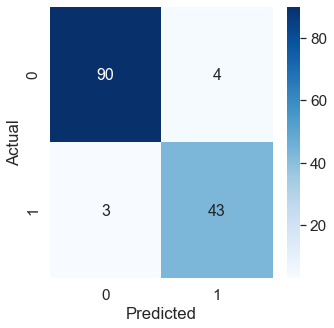

In [210]:
confusionmatrixplot(knn_model_optimized, val_inputs, val_target)


In [211]:
print(classification_report(val_target, knn_model.predict(val_inputs)))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96        94
           1       0.91      0.93      0.92        46

    accuracy                           0.95       140
   macro avg       0.94      0.95      0.94       140
weighted avg       0.95      0.95      0.95       140



In [212]:
print(classification_report(val_target, knn_model_optimized.predict(val_inputs)))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96        94
           1       0.91      0.93      0.92        46

    accuracy                           0.95       140
   macro avg       0.94      0.95      0.94       140
weighted avg       0.95      0.95      0.95       140



In [213]:
roc_auc_score(val_target, knn_model.predict_proba(val_inputs)[:, 1])


0.9833487511563368

In [214]:
roc_auc_score(val_target, knn_model_optimized.predict_proba(val_inputs)[:, 1])


0.9840425531914894

Using predict_proba method


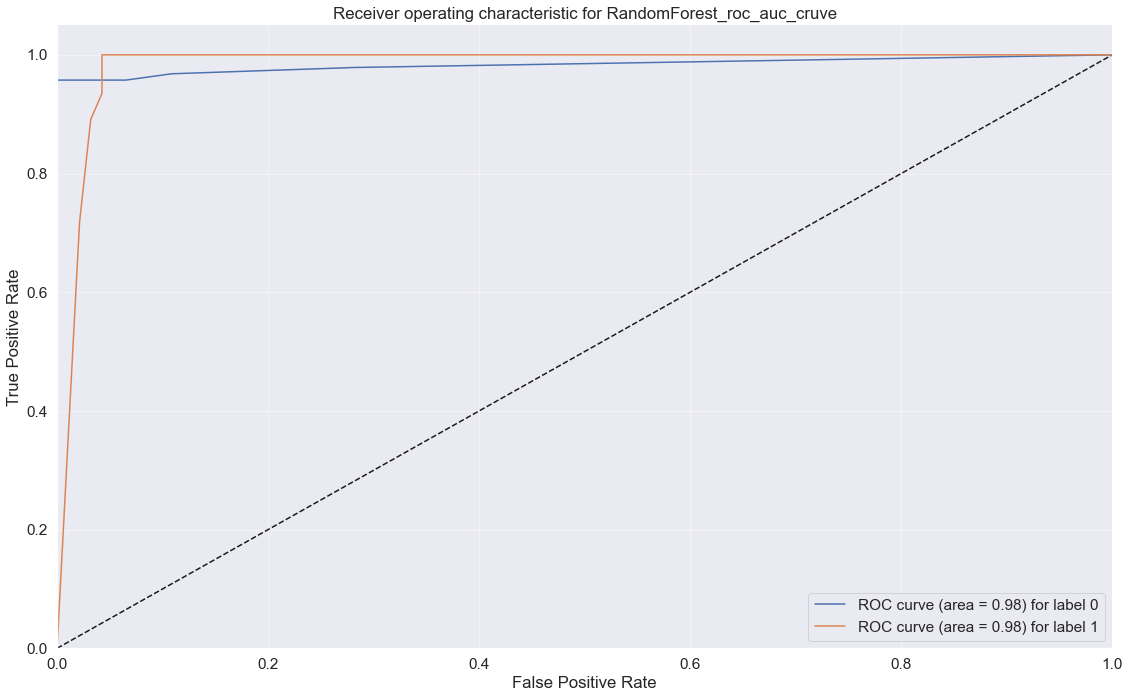

In [215]:
plot_multiclass_roc(knn_model, val_inputs, val_target, 2, figsize=(16, 10))


Using predict_proba method


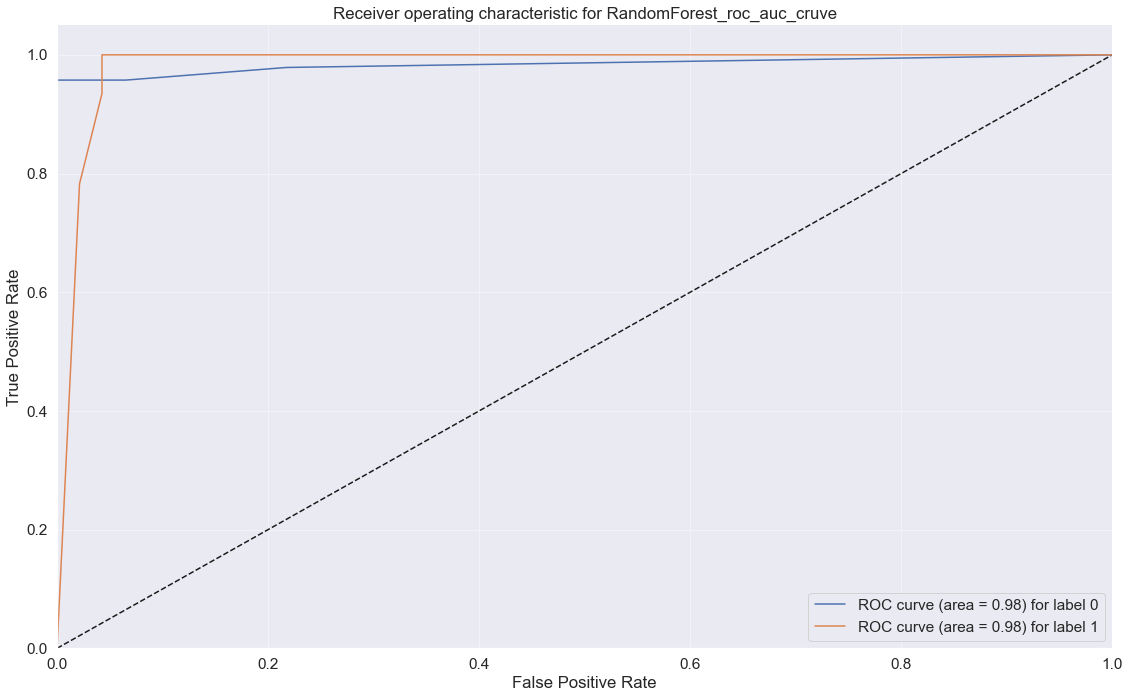

In [216]:
plot_multiclass_roc(knn_model_optimized, val_inputs,
                    val_target, 2, figsize=(16, 10))


KNN: f1=0.925 auc=0.960


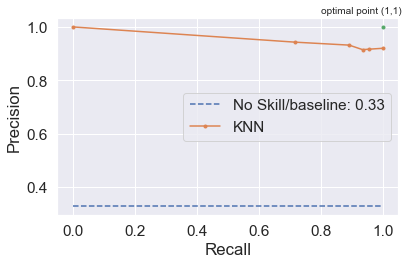

In [217]:
pre_recall_curve(knn_model, val_inputs, val_target)


KNN: f1=0.925 auc=0.964


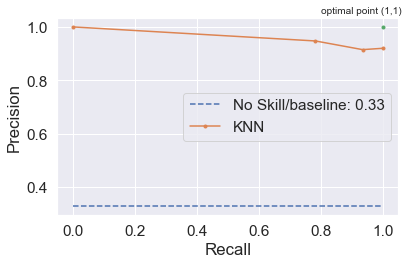

In [218]:
pre_recall_curve(knn_model_optimized, val_inputs, val_target)


`Classification Report`
* Optimized Model hasn't improved the precision, recall, and F1 scores for both classes compared to the base model.

`Confusion Matrix`
* Number of False Negatives and False Positves are the same for the base and optimized KNN model.

`Accuracy Score`
* Accuracy score for the optimized modeal was higher than the base model when working with the train dataset, but are otherwise the same when it came to the validation set.

`ROC AUC Score`
* AUC score for the optimized model is higher by a slight, negligible margin.

`Precision vs Recall curve and AUC score`
* AUC score for the optimized model is higher by a slight, negligible margin when it came to the precision vs recall curve.

Both Models perform the same, but since the purpose of the model is to predict breast cancer, I'd go for the optimized model.

## Error rate and accuracy rate w/ different k-values

In [229]:
error_rate = []


for i in range(1, 31):

    knn = KNeighborsClassifier(leaf_size=i, n_jobs=-1, n_neighbors=7)
    knn.fit(train_inputs, train_target)
    pred_i = knn.predict(val_inputs)
    error_rate.append(np.mean(pred_i != val_target))


Create a visualization to compare the error rate and k value

Text(0, 0.5, 'Error Rate')

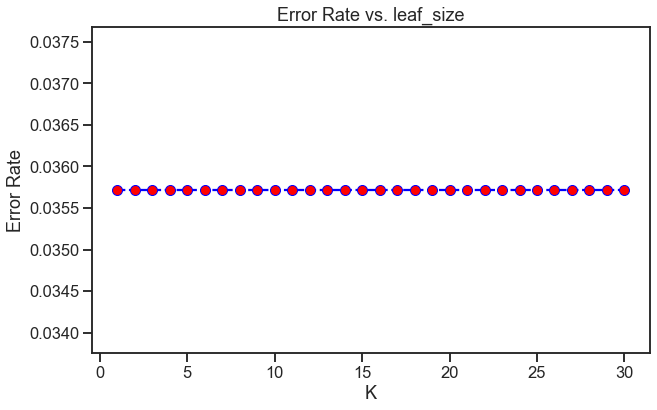

In [230]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. leaf_size')
plt.xlabel('K')
plt.ylabel('Error Rate')


Number of leaf vs error rate

In [ ]:
error_rate = []


for i in range(1, 51):

    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(train_inputs, train_target)
    pred_i = knn.predict(val_inputs)
    error_rate.append(np.mean(pred_i != val_target))


Create a visualization to compare the error rate and k value

Text(0, 0.5, 'Error Rate')

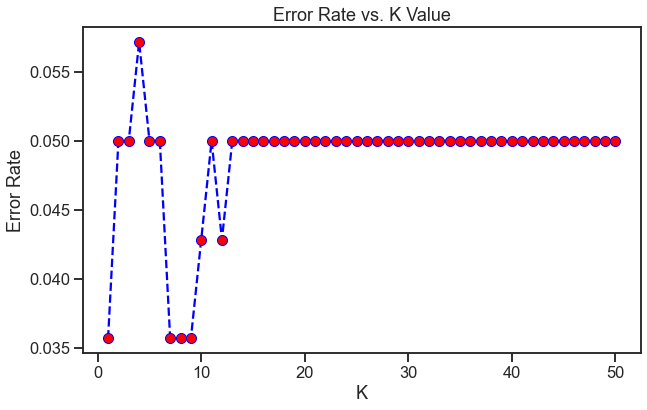

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [235]:
knn = KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=7)
knn.fit(train_inputs, train_target)
knn_predict = knn.predict(val_inputs)
accuracyscores(knn, train_inputs, train_target, val_inputs, val_target)


train model score 0.9761336515513126
non-train model score 0.9642857142857143
random model accuracy score 0.45
majority model accuracy score 0.6714285714285714


In [236]:
print(classification_report(val_target, knn_predict))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97        94
           1       0.94      0.96      0.95        46

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



None


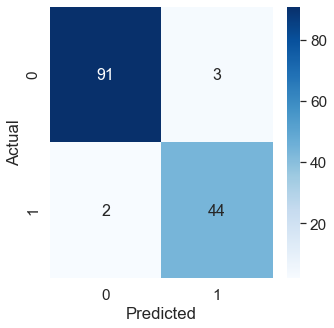

In [237]:
print(confusionmatrixplot(knn, val_inputs, val_target))


In [238]:
print(roc_auc_score(val_target, knn.predict_proba(val_inputs)[:, 1]))


0.9824236817761332


Using predict_proba method


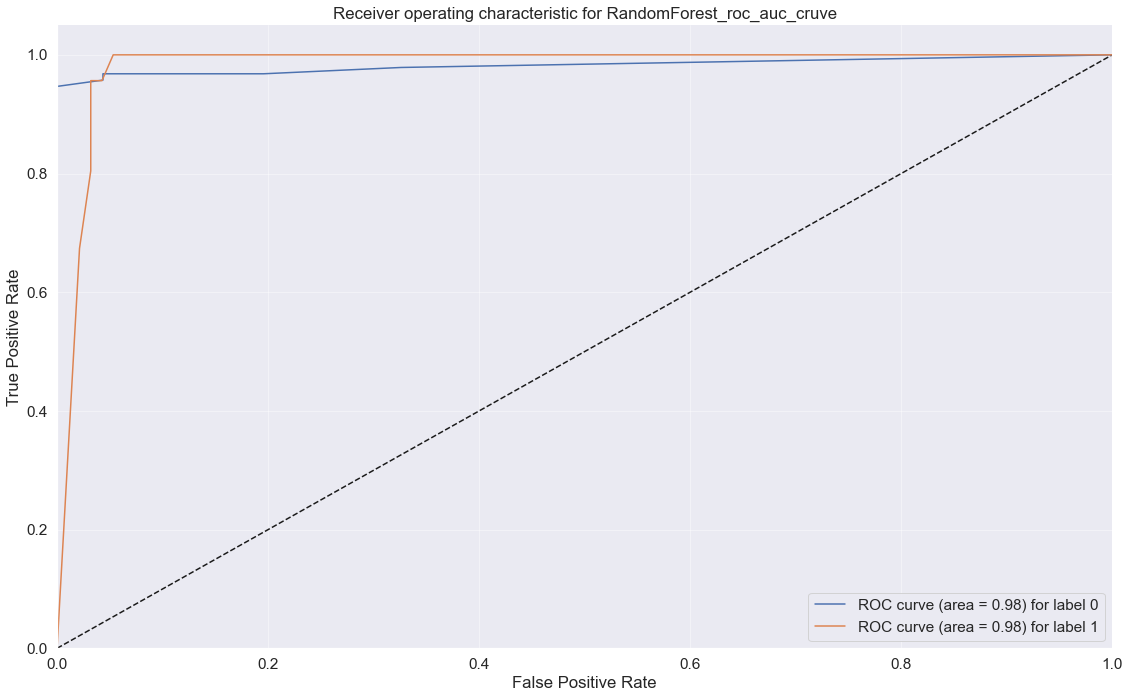

In [240]:
plot_multiclass_roc(knn, val_inputs, val_target, 2, figsize=(16, 10))


KNN: f1=0.946 auc=0.956


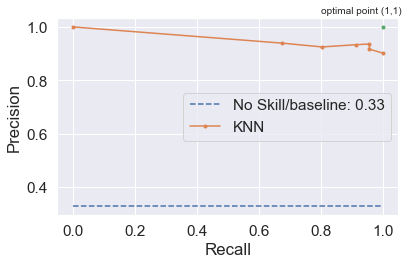

In [241]:
pre_recall_curve(knn, val_inputs, val_target)


`Classification Report`
* Optimized

            precision    recall  f1-score   support

            0       0.97      0.96      0.96        94
            1       0.91      0.93      0.92        46

* n_neighbors = 7

            precision    recall  f1-score   support

           0       0.98      0.97      0.97        94
           1       0.94      0.96      0.95        46

`Confusion Matrix`
* Optimized<br>
4 False Positive and 3 False Negatives
<br>
* model w/ n_neighbors = 7<br>
3 False Positive and 2 False Negatives

`Accuracy Score`
* Optimized: 95%
* model w/ n_neighbors 7: 96.42857142857143%

`ROC AUC Score`
* Optimized: 0.9840425531914894
* model w/ n_neighbors =7: 0.9824236817761332

`Precision vs Recall curve and AUC score`
* optimized - KNN: f1=0.925 auc=0.964
* model w/ n_neighbors = 7 - KNN: f1=0.946 auc=0.956

    Model with n_neighbors = 7 performs better than the optimized model in the metrics of `classification report`, `confusion matrix`, and `accuracy score`.

    Marginally worse in the AUC scores for both `ROC` and `precision vs recall` curve

# Test Dataset Metrics
Use model that was optimzed using grid searc VS the model that has n_neighbors = 7

In [242]:
accuracyscores(knn_model_optimized, train_inputs,
               train_target, test_inputs, test_target)


train model score 0.9809069212410502
non-train model score 0.9714285714285714
random model accuracy score 0.5428571428571428
majority model accuracy score 0.6428571428571429


In [243]:
accuracyscores(knn, train_inputs, train_target, test_inputs, test_target)


train model score 0.9761336515513126
non-train model score 0.9785714285714285
random model accuracy score 0.45714285714285713
majority model accuracy score 0.6428571428571429


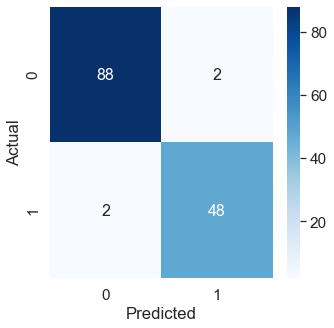

In [244]:
confusionmatrixplot(knn_model_optimized, test_inputs, test_target)


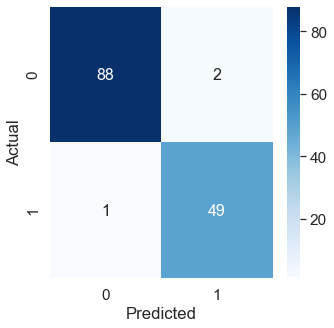

In [245]:
confusionmatrixplot(knn, test_inputs, test_target)


In [246]:
print(classification_report(test_target, knn_model_optimized.predict(test_inputs)))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.96      0.96      0.96        50

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [247]:
print(classification_report(test_target, knn.predict(test_inputs)))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.96      0.98      0.97        50

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [248]:
roc_auc_score(
    test_target, knn_model_optimized.predict_proba(test_inputs)[:, 1])


0.9822222222222221

In [249]:
roc_auc_score(test_target, knn.predict_proba(test_inputs)[:, 1])


0.9925555555555556

Using predict_proba method


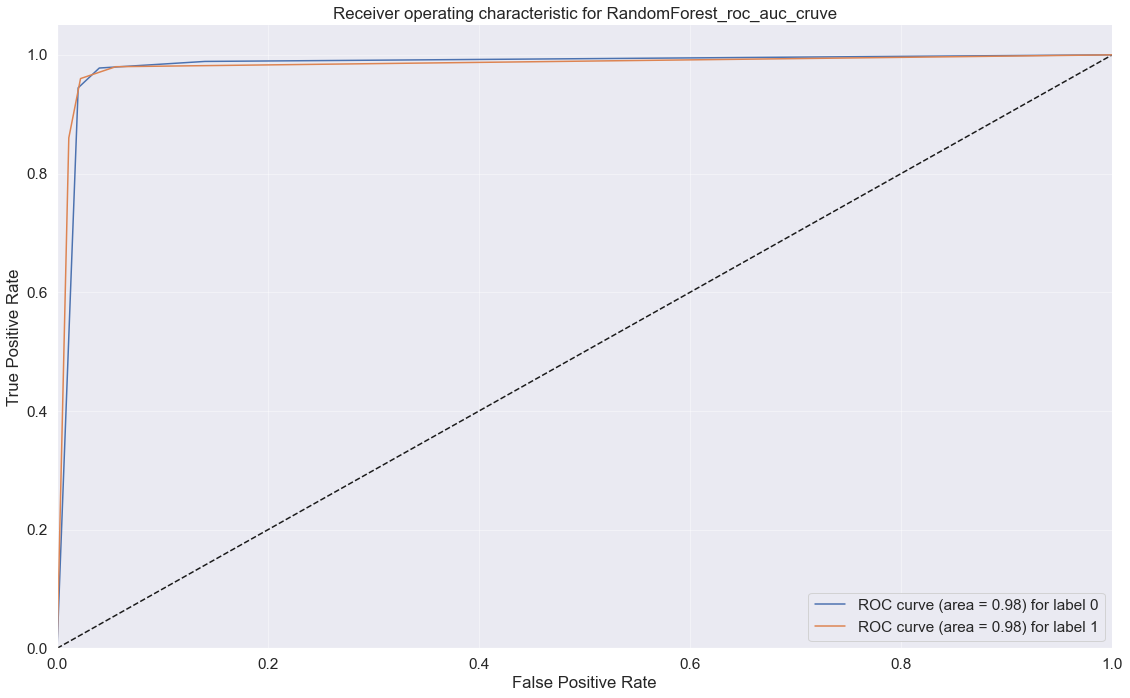

In [251]:
plot_multiclass_roc(knn_model_optimized, test_inputs,
                    test_target, 2, figsize=(16, 10))


Using predict_proba method


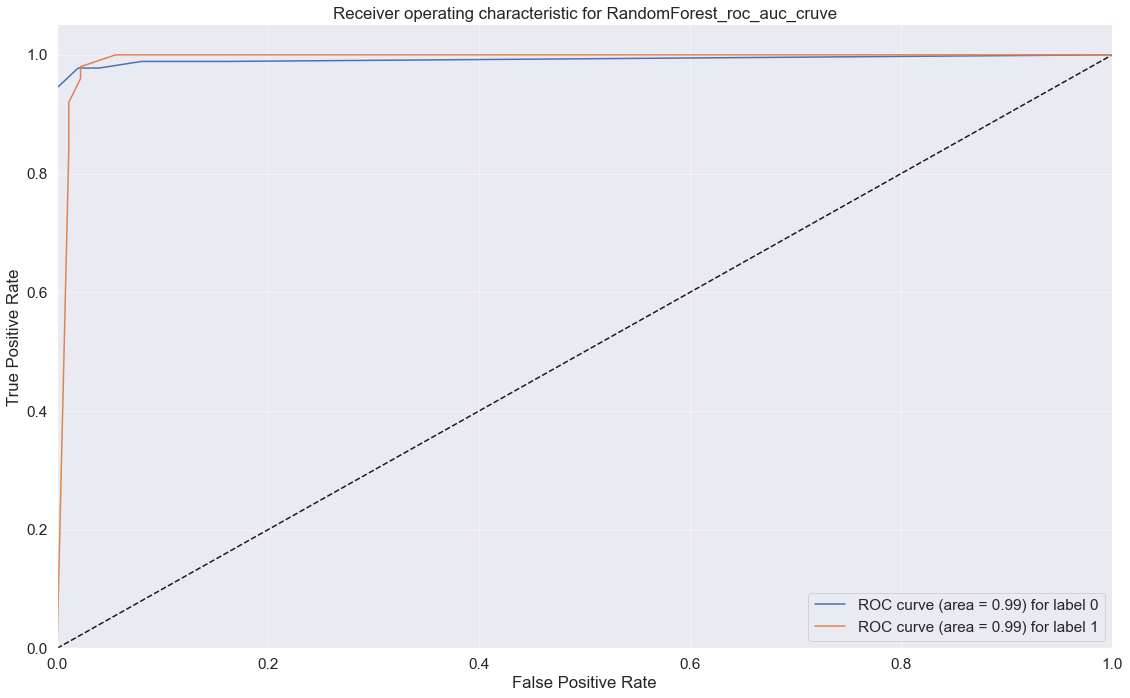

In [252]:
plot_multiclass_roc(knn, test_inputs, test_target, 2, figsize=(16, 10))


KNN: f1=0.960 auc=0.978


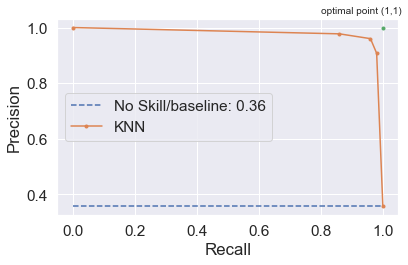

In [253]:
pre_recall_curve(knn_model_optimized, test_inputs, test_target)


KNN: f1=0.970 auc=0.985


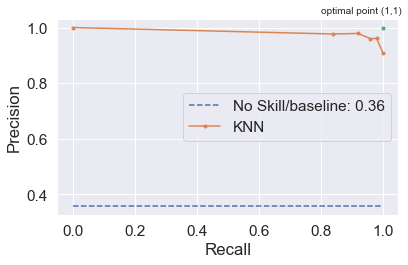

In [254]:
pre_recall_curve(knn, test_inputs, test_target)


    **see observation summary in conclusion section**

# Conclusion

Our model with the k_neighbors = 7 performs better than the optimized and base model in the metrics of `classification report`, `confusion matrix`, `accuracy score`,`ROC AUC score`, and `precision vs recall AUC score` curve.

Without a doubt the model called `knn` with the specific paramter of  `n_neighbors = 7` is the model that is best and is most approproate to use in the real-world/prduction